In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [22]:
bias = 100
X, y, coef = make_regression(100, n_features=5,bias=bias, random_state=42,coef=True)

In [24]:
expected_theta = np.hstack([[bias],coef])
expected_theta

array([100.        ,  64.59172413,  98.65152488,  57.07783047,
        60.57748194,  35.60967259])

In [25]:
X_update = np.hstack([np.ones((X.shape[0],1)),X])
X_update[:10]

array([[ 1.        , -0.93782504,  0.51504769,  0.51503527,  3.85273149,
         0.51378595],
       [ 1.        ,  1.0889506 , -0.71530371,  0.06428002,  0.67959775,
        -1.07774478],
       [ 1.        , -0.60170661, -1.05771093,  1.85227818,  0.82254491,
        -0.01349722],
       [ 1.        ,  0.8219025 ,  0.09176078,  0.08704707, -1.98756891,
        -0.29900735],
       [ 1.        ,  1.54993441,  0.81351722, -0.78325329, -1.23086432,
        -0.32206152],
       [ 1.        , -0.00797264, -0.8612842 ,  1.47994414,  1.52312408,
         0.07736831],
       [ 1.        , -0.89841467,  1.83145877,  0.49191917,  1.17944012,
        -1.32023321],
       [ 1.        , -0.71435142, -1.1913035 ,  1.86577451,  0.65655361,
         0.47383292],
       [ 1.        , -1.55066343,  0.47359243,  0.06856297, -0.91942423,
        -1.06230371],
       [ 1.        ,  0.78182287,  0.52194157, -1.23695071,  0.29698467,
        -1.32045661]])

In [48]:
class LinearRegression():
    def __init__(self, lr = .001, iters = 1):
    
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
    
        self.X = X
        self.y = y.reshape(-1,1)
        self.theta = np.zeros((self.X.shape[1],1))
        
        errors = []
        for i in range(self.iters):
            self.gradient_dec()
        return errors
    
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta -= d_theta * self.lr
        
    def gradient(self):
        yh = LinearRegression.hypothesis(self.X, self.theta)
        d_theta = np.mean((yh-self.y)* self.X, axis=0)
        print(yh.shape)
        return d_theta.reshape(-1,1)
    def predict(self, X):
        return LinearRegression.hypothesis(X, self.theta).flatten()
    def error(self):
        yh = LinearRegression.hypothesis(self.X, self.theta)
    
    @classmethod
    def hypothesis(cls, X, theta):
        return np.dot(X, theta)

In [32]:
# yh = np.dot(X_update, expected_theta.reshape(-1,1))
# print(yh[:10])
# print(y[:10])

In [49]:
model = LinearRegression()
model.fit(X_update,y)

(100, 1)


[]

In [51]:
yh = model.predict(X_update[:5])
print(yh)
print(y[:5])

[0.4396331  0.07109634 0.16000997 0.00449848 0.08686993]
[371.31612081 106.2305406  111.86102446  36.05942429 149.63008485]


# Logistic Regression

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [59]:
X, y = make_blobs(1000, centers= 2, random_state=42)

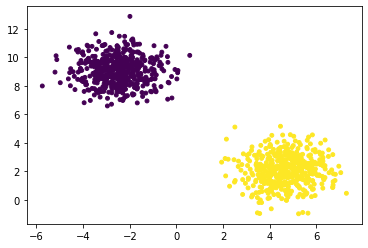

In [64]:
plt.scatter(X[:,0], X[:,1], c=y, s =15)

In [65]:
model = LogisticRegression()
model.fit(X,y)

c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
print(model.intercept_)
print(model.coef_)

[0.36449678]
[[ 2.0280732  -0.53391258]]


In [73]:
theta = model.coef_
slope = -theta[0][0] / theta[0][1] 
intercept = -model.intercept_ / theta[0][1]

In [74]:
x1 = X[:,0]
x2 = x1 * slope + intercept

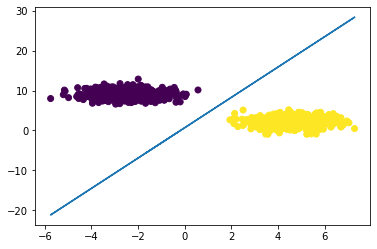

In [78]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1,x2)